# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [19]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_group_sum = (
    to_data.groupby([to_data.index]).sum())

dwelling_group_sum

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [18]:
#drop extra columns

dwelling_group_clean = dwelling_group_sum.drop(columns=["average_house_value", "shelter_costs_owned","shelter_costs_rented"])
dwelling_group_clean

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [21]:
# Save the dataframe as a csv file
file_path_save = Path("Data/dwelling_unit_year_sum.csv")
dwelling_group_clean.to_csv(file_path_save)

In [22]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    bar = data.plot.bar(
    title=title , xlabel=xlabel, rot=90, ylabel=ylabel, color = color)
    plt.show
    return bar

<AxesSubplot:title={'center':'Bar chart Dwelling Types for 2001'}, xlabel='Dwelling Type', ylabel='Dwelling types units'>

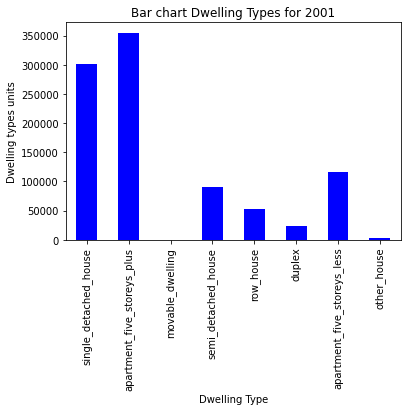

In [23]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(dwelling_group_clean.loc[2001, :], "Bar chart Dwelling Types for 2001", "Dwelling Type", "Dwelling types units", "Blue")

<AxesSubplot:title={'center':'Bar chart Dwelling Types for 2006'}, xlabel='Dwelling Type', ylabel='Dwelling types units'>

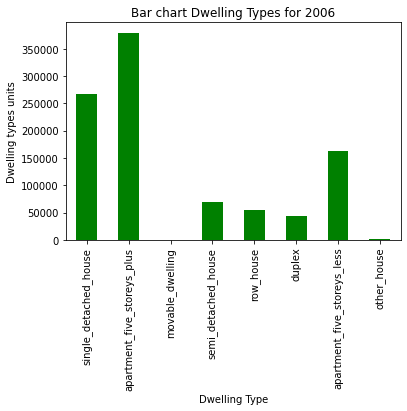

In [24]:
# Bar chart for 2006
create_bar_chart(dwelling_group_clean.loc[2006, :], "Bar chart Dwelling Types for 2006", "Dwelling Type", "Dwelling types units", "Green")

<AxesSubplot:title={'center':'Bar chart Dwelling Types for 2011'}, xlabel='Dwelling Type', ylabel='Dwelling types units'>

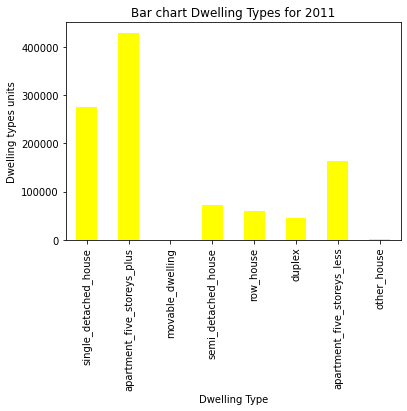

In [25]:
# Bar chart for 2011
create_bar_chart(dwelling_group_clean.loc[2011, :], "Bar chart Dwelling Types for 2011", "Dwelling Type", "Dwelling types units", "Yellow")

<AxesSubplot:title={'center':'Bar chart Dwelling Types for 2011'}, xlabel='Dwelling Type', ylabel='Dwelling types units'>

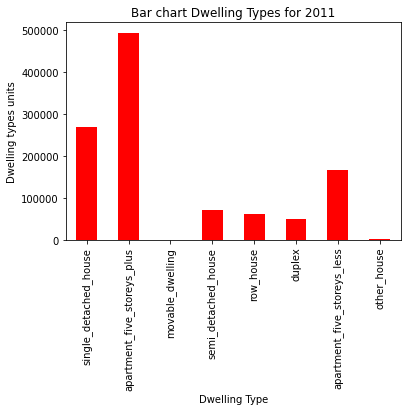

In [26]:
# Bar chart for 2016
create_bar_chart(dwelling_group_clean.loc[2016, :], "Bar chart Dwelling Types for 2011", "Dwelling Type", "Dwelling types units", "Red")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [28]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_cost_df = to_data.iloc[:, -2:]
shelter_cost_df.head()

shelter_costs_owned  shelter_costs_rented
year                                           
2001                  810                   870
2001                  806                   892
2001                  817                   924
2001                 1027                  1378
2001                 1007                  1163

In [41]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    line_chart = data.plot(title=title, xlabel=xlabel, rot=90 , ylabel=ylabel, color=color)
    return line_chart

# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
##Create 2 dataframes for owned dwellings and rented dwellings

In [32]:
owned_average_df=shelter_cost_df["shelter_costs_owned"].groupby([to_data.index]).mean()

rented_average_df=shelter_cost_df["shelter_costs_rented"].groupby([to_data.index]).mean()

# Line chart for owned dwellings

<AxesSubplot:title={'center':'Average Monthly Costs for Owned Dwellings'}, xlabel='Year', ylabel='Average Monthly Shelter Cost'>

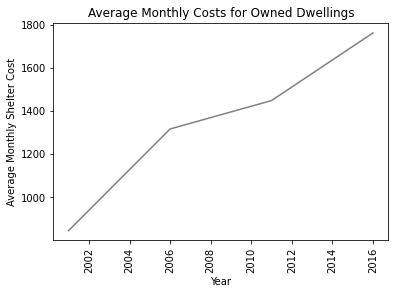

In [45]:
line_chart_owned_dwellings = create_line_chart(owned_average_df,"Average Monthly Costs for Owned Dwellings", "Year", "Average Monthly Shelter Cost","Grey")
line_chart_owned_dwellings

<AxesSubplot:title={'center':'Average Monthly Shelter Costs For Rented Dwellings '}, xlabel='Year', ylabel='Average Monthly Shelter Cost'>

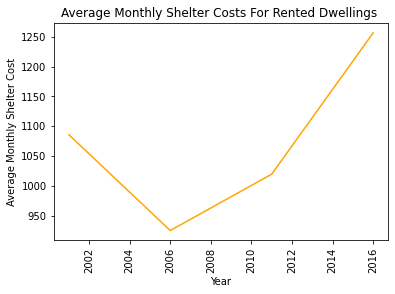

In [46]:
# Line chart for rented dwellings
line_chart_rented_dwellings = create_line_chart(rented_average_df,"Average Monthly Shelter Costs For Rented Dwellings ", "Year", "Average Monthly Shelter Cost","Orange")
line_chart_rented_dwellings


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [50]:
# Calculate the average house value per year
average_house_value_df = to_data[['average_house_value']].groupby([to_data.index]).mean()
average_house_value_df

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

<AxesSubplot:title={'center':'Average House Value in TO'}, xlabel='Year', ylabel='Average House Value'>

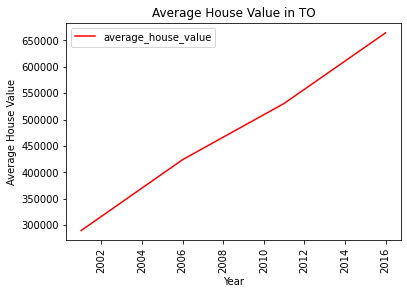

In [51]:
# Plot the average house value per year as a line chart
line_chart_for_house_value = create_line_chart(average_house_value_df,"Average House Value in TO","Year","Average House Value","Red")
line_chart_for_house_value

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [52]:
# Create a new DataFrame with the mean house values by neighbourhood per year
house_value_ngh_df = to_data[['average_house_value','neighbourhood']].groupby(['neighbourhood',to_data.index]).mean()
house_value_ngh_df

average_house_value
neighbourhood                year                     
Agincourt North              2001             200388.0
                             2006             293140.0
                             2011             366667.0
                             2016             459051.0
Agincourt South-Malvern West 2001             203047.0
...                                                ...
York University Heights      2016             425769.0
Yorkdale-Glen Park           2001             261784.0
                             2006             382954.0
                             2011             479009.0
                             2016             599698.0

[560 rows x 1 columns]

In [55]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
house_value_ngh_df.hvplot.line(x='year',y='average_house_value',groupby='neighbourhood',height=360,width=640)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [54]:
# Fetch the data of all dwelling types per year
dwelling_group_clean = to_data.drop(columns=["average_house_value", "shelter_costs_owned","shelter_costs_rented"]).groupby(['neighbourhood', to_data.index]).mean()
dwelling_group_clean

single_detached_house  \
neighbourhood                year                          
Agincourt North              2001                 3715.0   
                             2006                 3295.0   
                             2011                 3385.0   
                             2016                 3345.0   
Agincourt South-Malvern West 2001                 3250.0   
...                                                  ...   
York University Heights      2016                 1235.0   
Yorkdale-Glen Park           2001                 2540.0   
                             2006                 2220.0   
                             2011                 2220.0   
                             2016                 2165.0   

                                   apartment_five_storeys_plus  \
neighbourhood                year                                
Agincourt North              2001                       1480.0   
                             2006                       2060.0   
                             2011                       2130.0   
                             2016                       2120.0   
Agincourt South-Malvern West 2001                       1835.0   
...                                                        ...   
York University Heights      2016                       5505.0   
Yorkdale-Glen Park           2001                       1515.0   
                             2006                       1445.0   
                             2011                       1245.0   
                             2016                       1185.0   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                year                                          
Agincourt North              2001               0.0               1055.0   
                             2006               0.0                775.0   
                             2011               5.0                820.0   
                             2016               5.0                805.0   
Agincourt South-Malvern West 2001               0.0                545.0   
...                                             ...                  ...   
York University Heights      2016               0.0               1360.0   
Yorkdale-Glen Park           2001               0.0                 60.0   
                             2006               0.0                 70.0   
                             2011               0.0                 85.0   
                             2016               0.0                 80.0   

                                   row_house  duplex  \
neighbourhood                year                      
Agincourt North              2001     1295.0   195.0   
                             2006     1425.0   600.0   
                             2011     1465.0   610.0   
                             2016     1440.0   645.0   
Agincourt South-Malvern West 2001      455.0   105.0   
...                                      ...     ...   
York University Heights      2016      775.0   280.0   
Yorkdale-Glen Park           2001      265.0   120.0   
                             2006      470.0   435.0   
                             2011      465.0   490.0   
                             2016      600.0   465.0   

                                   apartment_five_storeys_less  other_house  
neighbourhood                year                                            
Agincourt North              2001                        185.0          5.0  
                             2006                        565.0          0.0  
                             2011                        705.0         20.0  
                             2016                        735.0         15.0  
Agincourt South-Malvern West 2001                        425.0          0.0  
...                                                        ...          ...  
York University Heights      2016                    

In [82]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_group_clean.hvplot.bar(x='year',xlabel='Year',ylabel="Dwelling Type Units", groupby='neighbourhood', height=540, width = 960 , rot = 45)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [60]:
# Getting the data from the top 10 expensive neighbourhoods #####IS THIS THE BEST WAY??WITH HEAD 10 ?
ngh_by_value_df = to_data.groupby(['neighbourhood']).mean().sort_values(by=['average_house_value'],ascending=False).reset_index()

top_10_expensive_neighbourhoods = ngh_by_value_df.head(10)

top_10_expensive_neighbourhoods

neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3                      4641.25              0.00               486.25   
4                      1670.00              0.00               185.00   
5                      2310.00              0.00               288.75   
6                      1981.25              0.00                43.75   
7                      3392.50              0.00                12.50   
8                       576.25              0.00                66.25   
9                      3948.75              0.00               425.00   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0      90.00    25.0                        40.00         0.00   
1      45.00    75.0                      1027.50         3.75   
2      38.75   225.0                       966.25        16.25   
3     245.00   327.5                      1618.75         2.50   
4     552.50    97.5                       586.25         5.00   
5     201.25   162.5                      1192.50         2.50   
6      57.50   287.5                      1275.00        88.75   
7      16.25    82.5                       402.50         1.25   
8      48.75    20.0                       336.25         2.50   
9     212.50   172.5                      1308.75         6.25   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0           1526485.75              2360.75               2321.75  
1           1195992.50              1781.00               1313.75  
2           1094027.75              1954.00               1372.75  
3           1093640.00              1909.75               1537.25  
4            999107.00              1880.25               1384.50  
5            981064.25              1873.75               1547.75  
6            930415.25              1786.75               1255.00  
7            851680.50              1722.75               1245.50  
8            843234.25              1736.75               1622.00  
9            813220.25              1680.75               1369.00

In [84]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods.hvplot.bar('neighbourhood', 'average_house_value', title='The Top 10 most expensive TO Neighbourhoods',xlabel='Neighbourhood',ylabel='average_house_value',height=540,width=960,rot=45)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [66]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [68]:
# Calculate the mean values for each neighborhood
house_value_mean = to_data.groupby(['neighbourhood']).mean().reset_index()
house_value_mean.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [70]:
# Join the average values with the neighbourhood locations
joined_df = pd.concat([df_neighbourhood_locations,house_value_mean],axis='columns', join = 'inner')
joined_df

neighbourhood        lat        lon  \
0                 Agincourt North  43.805441 -79.266712   
1    Agincourt South-Malvern West  43.788658 -79.265612   
2                       Alderwood  43.604937 -79.541611   
3                           Annex  43.671585 -79.404001   
4               Banbury-Don Mills  43.737657 -79.349718   
..                            ...        ...        ...   
135                      Wychwood  43.676919 -79.425515   
136                Yonge-Eglinton  43.704689 -79.403590   
137                Yonge-St.Clair  43.687859 -79.397871   
138       York University Heights  43.765736 -79.488883   
139            Yorkdale-Glen Park  43.714672 -79.457108   

                    neighbourhood  single_detached_house  \
0                 Agincourt North                3435.00   
1    Agincourt South-Malvern West                2897.50   
2                       Alderwood                2903.75   
3                           Annex                 751.25   
4               Banbury-Don Mills                3572.50   
..                            ...                    ...   
135                      Wychwood                1056.25   
136                Yonge-Eglinton                1468.75   
137                Yonge-St.Clair                 565.00   
138       York University Heights                1355.00   
139            Yorkdale-Glen Park                2286.25   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                        1947.50              2.50               863.75   
1                        2180.00              1.25               375.00   
2                         302.50              1.25               503.75   
3                        7235.00              1.25              1375.00   
4                        5388.75              1.25               273.75   
..                           ...               ...                  ...   
135                      1236.25              0.00               992.50   
136                      1638.75              0.00               470.00   
137                      3948.75              0.00               425.00   
138                      5165.00              1.25              1316.25   
139                      1347.50              0.00                73.75   

     row_house  duplex  apartment_five_storeys_less  other_house  \
0      1406.25  512.50                       547.50        10.00   
1       456.25  523.75                       628.75        32.50   
2        76.25  302.50                       502.50         1.25   
3       613.75  355.00                      4605.00        83.75   
4       626.25   32.50                      1340.00         0.00   
..         ...     ...                          ...          ...   
135     298.75  325.00                      1878.75        17.50   
136      33.75  328.75                      1385.00         6.25   
137     212.50  172.50                      1308.75         6.25   
138     662.50  188.75                      1085.00        33.75   
139     450.00  377.50                       722.50         7.50   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
0              329811.50              1109.00                983.50  
1              334189.00              1131.25                985.00  
2              427922.50              1166.75               1003.25  
3              746977.00              1692.75               1315.25  
4              612039.00              1463.50               1242.75  
..                   ...                  ...                   ...  
135            565976.50              1390.75               1017.25  
136            809745.75              1799.50               1347.75  
137            813220.25              1680.75               1369.00  
138            305899.50              1116.75                937.50  
139            430861.25              1122.50                942.50  

[140 rows x 15 columns]

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

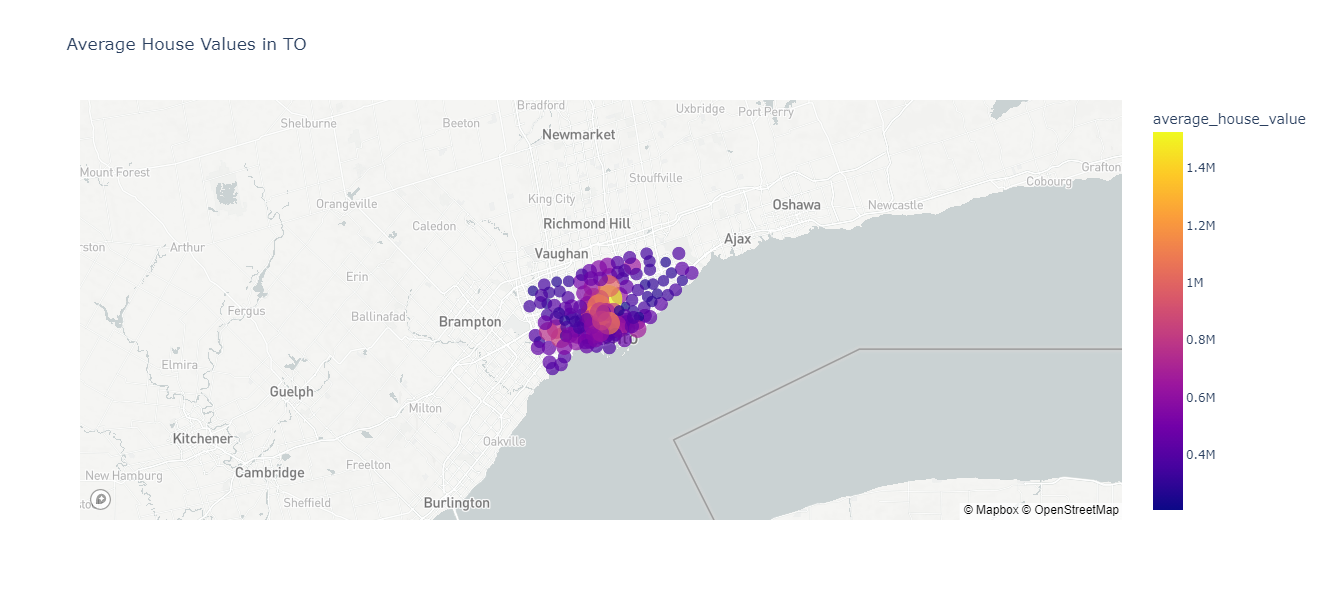

In [86]:
# Create a scatter mapbox to analyze neighbourhood info
load_dotenv()

map_box_api = os.getenv("mapbox")

px.set_mapbox_access_token(map_box_api)

map_plot = px.scatter_mapbox(
    joined_df,
    lat="lat",
    lon="lon",
    title="Average House Values in TO",
    size="average_house_value",
    color="average_house_value",
    height = 600
    
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [88]:
house_average_value_bar = to_data[['neighbourhood','average_house_value']].groupby(['neighbourhood',to_data.index]).mean()
house_average_value_bar = house_average_value_bar.reset_index()
house_average_value_bar

neighbourhood  year  average_house_value
0                 Agincourt North  2001             200388.0
1                 Agincourt North  2006             293140.0
2                 Agincourt North  2011             366667.0
3                 Agincourt North  2016             459051.0
4    Agincourt South-Malvern West  2001             203047.0
..                            ...   ...                  ...
555       York University Heights  2016             425769.0
556            Yorkdale-Glen Park  2001             261784.0
557            Yorkdale-Glen Park  2006             382954.0
558            Yorkdale-Glen Park  2011             479009.0
559            Yorkdale-Glen Park  2016             599698.0

[560 rows x 3 columns]

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [ ]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [ ]:
# Create the sunburst chart
# YOUR CODE HERE!